<a href="https://colab.research.google.com/github/mseoulum/AIFFEL_Quest/blob/main/trip(240613).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 살펴보기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/Aiffel/trip.csv')

In [2]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [3]:
# 데이터 변수 살펴보기
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [4]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [5]:
# 불필요한 데이터 삭제
data.drop('passenger_name', axis=1, inplace=True)

# 결측치 판단 및 처리
- 결측치 유무와 비율을 살펴보고 적절한 방법으로 처리

In [6]:
# 결측치 개수 확인
data.isnull().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [7]:
data[data['fare_amount'].isna()]

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [8]:
# 각 열의 데이터 결측치 비율 구하기
data.isna().mean()


tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [9]:
# tip_amount 컬럼의 결측치는 데이터 비율이 낮은 편이기 때문에 삭제하기로 선택
data.dropna(subset=['fare_amount'], inplace=True)

In [10]:
# 결측치 처리가 잘되었는지 확인
data.isnull().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              0
tip_amount               0
tolls_amount             0
dtype: int64

# 이상치 판단 및 처리
- 숫자형 변수 각각에 대해, 데이터의 index와 변수 값 사이의 scatter plot을 그려보고 이상치 관찰될 경우 제거

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22698 entries, 0 to 22700
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tpep_pickup_datetime   22698 non-null  object 
 1   tpep_dropoff_datetime  22698 non-null  object 
 2   payment_method         22698 non-null  object 
 3   passenger_count        22698 non-null  int64  
 4   trip_distance          22698 non-null  float64
 5   fare_amount            22698 non-null  float64
 6   tip_amount             22698 non-null  float64
 7   tolls_amount           22698 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.6+ MB


In [12]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000
mean,1.643581,2.912318,13.024009,1.835327,0.312302
std,1.304983,3.651335,13.240074,2.800093,1.398775
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


## 시각화

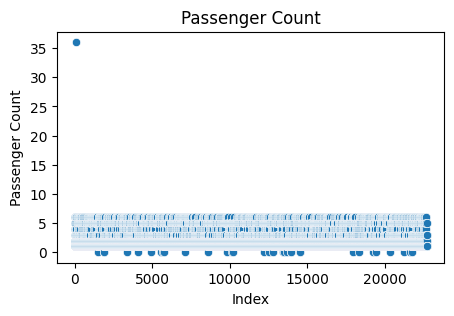

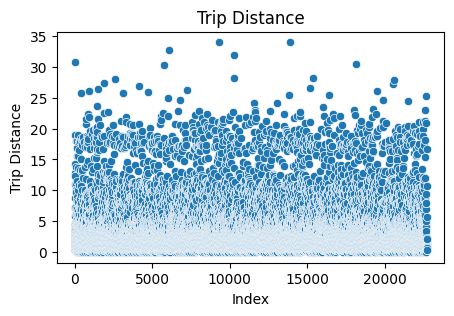

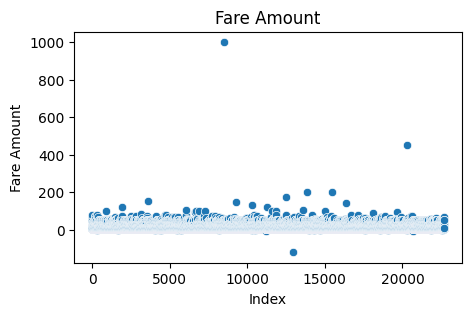

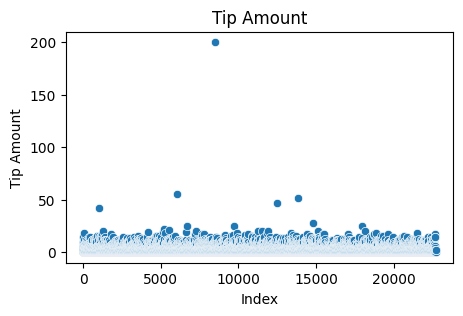

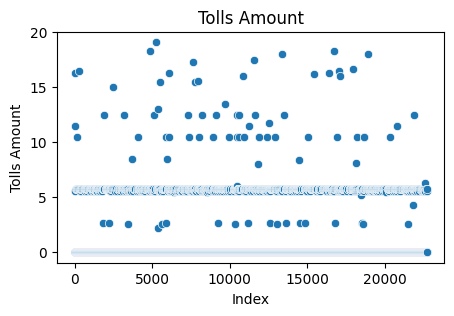

In [13]:
# Passenger_count
plt.figure(figsize=(5, 3))
sns.scatterplot(x=data.index, y=data['passenger_count'])
plt.title('Passenger Count')
plt.xlabel('Index')
plt.ylabel('Passenger Count')
plt.show()

# trip_distance
plt.figure(figsize=(5, 3))
sns.scatterplot(x=data.index, y=data['trip_distance'])
plt.title('Trip Distance')
plt.xlabel('Index')
plt.ylabel('Trip Distance')
plt.show()

# fare_amount
plt.figure(figsize=(5, 3))
sns.scatterplot(x=data.index, y=data['fare_amount'])
plt.title('Fare Amount')
plt.xlabel('Index')
plt.ylabel('Fare Amount')
plt.show()

# tip_amount
plt.figure(figsize=(5, 3))
sns.scatterplot(x=data.index, y=data['tip_amount'])
plt.title('Tip Amount')
plt.xlabel('Index')
plt.ylabel('Tip Amount')
plt.show()

# tolls_amount
plt.figure(figsize=(5, 3))
sns.scatterplot(x=data.index, y=data['tolls_amount'])
plt.title('Tolls Amount')
plt.xlabel('Index')
plt.ylabel('Tolls Amount')
plt.show()

### 승객 수(passenger_count)

In [14]:
# 승객수가 0, 36은 오류로 보임 -> 미국 택시가 보통 4명이지만, 일부 도시에서는 7명까지인 경우도 있다고 하므로.. 5~7명 이상인 경우 확인
data[(data['passenger_count'] >= 5) & (data['passenger_count'] <= 7)]

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
5,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,Debit Card,6,2.30,9.0,2.06,0.00
36,11/05/2017 1:35:25 AM,11/05/2017 1:43:39 AM,Cash,5,2.69,9.5,0.00,0.00
49,03/11/2017 4:46:32 AM,03/11/2017 4:57:02 AM,Credit Card,6,2.69,11.0,0.00,0.00
61,04/26/2017 6:08:41 PM,04/26/2017 6:11:08 PM,Cash,5,0.38,4.0,1.16,0.00
...,...,...,...,...,...,...,...,...
22658,09/24/2017 9:27:32 AM,09/24/2017 9:35:15 AM,Credit Card,6,1.58,8.0,0.00,0.00
22661,01/17/2017 9:14:49 PM,01/17/2017 9:29:11 PM,Credit Card,5,3.15,12.5,2.50,0.00
22669,10/07/2017 1:34:22 PM,10/07/2017 1:45:29 PM,Debit Card,6,1.07,8.5,1.86,0.00
22670,02/22/2017 6:45:04 AM,02/22/2017 7:19:34 AM,Debit Card,5,25.30,67.5,17.08,0.00


In [15]:
# 22698중 1835개이나, 일반적인 택시 운행임을 감안해 이상치로 제거 결정
data = data[data['passenger_count'] < 5]

### 운행거리(trip_distance)

In [16]:
# 운행거리가 0인 경우 확인
data[data['trip_distance'] == 0].shape[0]

144

In [17]:
# 운행거리가 0인 경우 fare_amount 비교
distance_amount_comparison = data[data['trip_distance'] == 0][['trip_distance', 'fare_amount']]

# 운행거리가 0인데 fare_amount가 0이 아닌 경우 확인
incorrect_fare_distance = distance_amount_comparison[distance_amount_comparison['fare_amount'] != 0]
incorrect_fare_distance

,trip_distance,fare_amount
129,0.0,20.0
248,0.0,2.5
293,0.0,2.5
321,0.0,2.5
426,0.0,2.5
...,...,...
22045,0.0,52.0
22192,0.0,2.5
22327,0.0,16.8
22385,0.0,10.0


In [18]:
# 운행거리가 0인데 fare_amount가 0이 아닌 데이터 삭제
data = data[~((data['trip_distance'] == 0) & (data['fare_amount'] != 0))]

In [19]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,20721.000000,20721.000000,20721.000000,20721.000000,20721.000000
mean,1.313691,2.927214,12.956619,1.830818,0.307771
std,0.663478,3.658113,12.859109,2.793352,1.382157
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,1.000000,6.500000,0.000000,0.000000
50%,1.000000,1.620000,9.500000,1.360000,0.000000
75%,1.000000,3.100000,14.500000,2.450000,0.000000
max,4.000000,33.960000,999.990000,200.000000,19.100000


In [20]:
# 운행거리의 중간 구간 더 보기
quantiles = data['trip_distance'].quantile([0.85, 0.95, 0.96, 0.97, 0.98, 0.99])
quantiles

0.85     4.760
0.95    10.530
0.96    11.672
0.97    14.082
0.98    17.116
0.99    18.842
Name: trip_distance, dtype: float64

In [21]:
# 운행거리가 긴 순서대로 나열, 대략 200개 정도부터 0.99구간이라 영향이 미미한 것 같아 구간은 추가 작업 종료
data.sort_values(by='trip_distance', ascending=False).head(200)

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
9282,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,Cash,2,33.96,150.00,0.00,0.00
13863,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Credit Card,1,33.92,200.01,51.64,5.76
6066,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,Debit Card,1,32.72,107.00,55.50,16.26
10293,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,Cash,1,31.95,131.00,0.00,0.00
30,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,Credit Card,1,30.83,80.00,18.56,11.52
...,...,...,...,...,...,...,...,...
12238,05/06/2017 12:35:44 AM,05/06/2017 1:16:40 AM,Cash,1,19.00,52.00,0.00,0.00
9530,07/05/2017 4:47:44 PM,07/05/2017 5:41:23 PM,Cash,1,19.00,52.00,15.76,5.76
4887,04/14/2017 7:36:09 AM,04/14/2017 8:08:02 AM,Credit Card,1,18.99,68.00,15.00,18.26
9982,06/10/2017 10:56:37 AM,06/10/2017 11:53:14 AM,Credit Card,1,18.97,52.00,11.71,5.76


### 운행요금(fare_amount)

In [22]:
# 요금이 -인 데이터 삭제
data = data[data['fare_amount'] >= 0]
data

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
6,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,Cash,1,12.83,47.5,9.86,0.00
...,...,...,...,...,...,...,...,...
22696,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [23]:
# 운행요금 높은 데이터 보기
top_fare_amounts = data['fare_amount'].sort_values(ascending=False).head(20).index
top_fare_data = data.loc[top_fare_amounts]
top_fare_data

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
8478,02/06/2017 5:50:10 AM,02/06/2017 5:51:08 AM,Credit Card,1,2.60,999.99,200.00,0.00
13863,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Credit Card,1,33.92,200.01,51.64,5.76
3584,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,Credit Card,1,7.30,152.00,0.00,0.00
9282,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,Cash,2,33.96,150.00,0.00,0.00
16381,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,Cash,1,25.50,140.00,0.00,16.26
10293,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,Cash,1,31.95,131.00,0.00,0.00
1930,06/16/2017 6:30:08 PM,06/16/2017 7:18:50 PM,Debit Card,2,12.50,120.00,5.00,12.50
6066,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,Debit Card,1,32.72,107.00,55.50,16.26
13623,11/04/2017 1:32:14 PM,11/04/2017 2:18:50 PM,Debit Card,2,19.80,105.00,8.00,2.64
14997,03/30/2017 12:20:30 PM,03/30/2017 12:34:15 PM,Credit Card,3,11.89,100.00,0.00,0.00


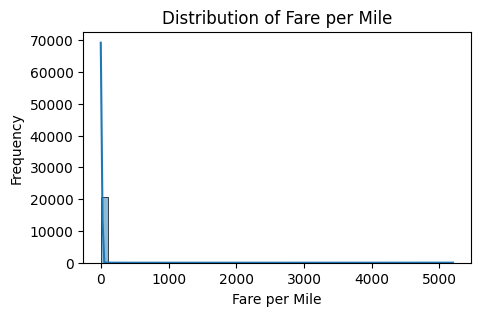

In [24]:
# 주행거리와 요금 간 비율 계산
data['fare_per_mile'] = data['fare_amount'] / data['trip_distance']

# 비율의 분포 확인
plt.figure(figsize=(5, 3))
sns.histplot(data['fare_per_mile'].dropna(), bins=50, kde=True)
plt.title('Distribution of Fare per Mile')
plt.xlabel('Fare per Mile')
plt.ylabel('Frequency')
plt.show()

In [25]:
# 비율의 상위 3% 이상치를 이상치로 간주
threshold = data['fare_per_mile'].quantile(0.97)
outliers = data[data['fare_per_mile'] > threshold]

# 이상치 확인
outliers

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,fare_per_mile
162,11/11/2017 8:16:16 PM,11/11/2017 8:17:14 PM,Credit Card,1,0.23,52.0,0.00,0.0,226.086957
171,05/31/2017 8:58:40 PM,05/31/2017 9:02:51 PM,Cash,2,0.30,4.5,0.00,0.0,15.000000
206,07/20/2017 5:31:40 PM,07/20/2017 5:52:46 PM,Cash,1,0.78,13.0,2.96,0.0,16.666667
213,11/17/2017 8:45:06 PM,11/17/2017 8:54:02 PM,Credit Card,2,0.50,7.0,0.00,0.0,14.000000
257,02/15/2017 6:11:43 PM,02/15/2017 6:15:55 PM,Cash,1,0.20,4.5,0.00,0.0,22.500000
...,...,...,...,...,...,...,...,...,...
22545,10/06/2017 11:23:16 AM,10/06/2017 11:37:23 AM,Debit Card,1,0.46,9.5,0.00,0.0,20.652174
22559,07/07/2017 8:57:59 PM,07/07/2017 9:01:55 PM,Cash,1,0.33,4.5,1.16,0.0,13.636364
22571,09/20/2017 9:18:41 AM,09/20/2017 9:32:05 AM,Debit Card,1,0.60,9.0,1.20,0.0,15.000000
22618,04/25/2017 2:55:40 AM,04/25/2017 2:56:50 AM,Credit Card,1,0.20,3.0,0.00,0.0,15.000000


In [26]:
# 이상치 데이터의 인덱스 확인
outlier_indices = outliers.index
outlier_indices

Index([  162,   171,   206,   213,   257,   260,   304,   325,   327,   418,
       ...
       22339, 22413, 22486, 22498, 22525, 22545, 22559, 22571, 22618, 22619],
      dtype='int64', length=620)

In [27]:
# 이상치 데이터를 원본 데이터에서 제거
data = data.drop(outlier_indices)

### 팁(tip_amount)

In [29]:
# 데이터프레임 인덱스 재설정
data = data.reset_index(drop=True)

In [30]:
# 팁이 200은 너무 높음. 확인 필요
data['tip_amount'].sort_values(ascending=False).head(10)

5324     55.50
12254    51.64
862      42.29
13112    28.00
8571     25.20
15887    25.00
4863     21.30
10204    20.00
13363    20.00
10521    20.00
Name: tip_amount, dtype: float64

In [31]:
# 팁 200은 자연스럽게 삭제된 듯하나 0.99구간까지도 11.71 수준
tip_quantiles = data['tip_amount'].quantile([0.85, 0.95, 0.96, 0.97, 0.98, 0.99])
tip_quantiles

0.85     3.26
0.95     6.30
0.96     7.11
0.97     8.15
0.98    10.00
0.99    11.71
Name: tip_amount, dtype: float64

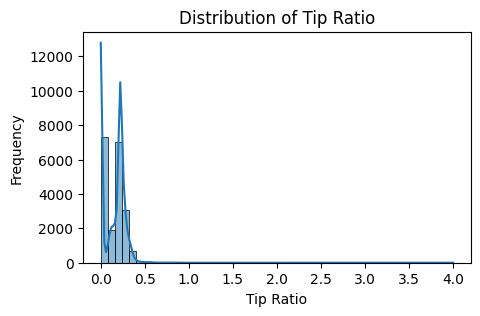

In [32]:
# 운임요금 대비 팁의 비율 계산
data['tip_ratio'] = data['tip_amount'] / data['fare_amount']

# 비율의 분포 확인
plt.figure(figsize=(5, 3))
sns.histplot(data['tip_ratio'].dropna(), bins=50, kde=True)
plt.title('Distribution of Tip Ratio')
plt.xlabel('Tip Ratio')
plt.ylabel('Frequency')
plt.show()

In [33]:
# 일반적으로 15~20% 비율이 적정 팁수준으로 간주되므로, 30% 초과 데이터를 이상치로 간주
tip_threshold = 0.30
tip_outliers = data[data['tip_ratio'] > tip_threshold]
tip_outliers

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,fare_per_mile,tip_ratio
2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0,5.540541,0.311707
24,01/14/2017 7:58:42 PM,01/14/2017 8:05:59 PM,Debit Card,1,1.72,8.0,2.79,0.0,4.651163,0.348750
37,12/08/2017 12:21:55 PM,12/08/2017 12:30:38 PM,Cash,1,1.28,7.5,5.00,0.0,5.859375,0.666667
53,03/07/2017 8:19:42 PM,03/07/2017 8:29:08 PM,Cash,2,2.51,10.0,3.39,0.0,3.984064,0.339000
55,03/03/2017 8:02:59 AM,03/03/2017 8:05:43 AM,Credit Card,1,0.85,4.5,1.59,0.0,5.294118,0.353333
...,...,...,...,...,...,...,...,...,...,...
20041,01/01/2017 7:45:04 PM,01/01/2017 8:09:50 PM,Credit Card,1,4.70,19.5,6.05,0.0,4.148936,0.310256
20058,01/13/2017 8:04:06 AM,01/13/2017 8:09:48 AM,Cash,1,0.60,5.5,3.00,0.0,9.166667,0.545455
20064,02/03/2017 8:47:51 AM,02/03/2017 8:59:05 AM,Debit Card,1,1.40,9.0,2.90,0.0,6.428571,0.322222
20070,01/11/2017 7:31:30 PM,01/11/2017 7:39:52 PM,Credit Card,1,2.09,8.5,2.58,0.0,4.066986,0.303529


In [34]:
# 이상치 데이터의 인덱스 확인
tip_outlier_indices = tip_outliers.index
tip_outlier_indices

Index([    2,    24,    37,    53,    55,    73,    80,   113,   142,   171,
       ...
       19977, 19991, 20014, 20018, 20027, 20041, 20058, 20064, 20070, 20071],
      dtype='int64', length=1146)

In [35]:
# 이상치 데이터를 원본 데이터에서 제거
data = data.drop(tip_outlier_indices)

### 통행료(tolls_amount)

In [37]:
tolls_quantiles = data['tolls_amount'].quantile([0.85, 0.95, 0.96, 0.97, 0.98, 0.99])
tolls_quantiles

0.85    0.00
0.95    2.64
0.96    5.54
0.97    5.76
0.98    5.76
0.99    5.76
Name: tolls_amount, dtype: float64

In [38]:
# 데이터프레임 인덱스 재설정
data = data.reset_index(drop=True)

In [39]:
# IQR 계산
Q1 = data['tolls_amount'].quantile(0.25)
Q3 = data['tolls_amount'].quantile(0.75)
IQR = Q3 - Q1

In [40]:
# 이상치 기준 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [41]:
# 이상치 데이터 필터링
tolls_outliers = data[(data['tolls_amount'] < lower_bound) | (data['tolls_amount'] > upper_bound)]

In [42]:
# 이상치 데이터의 인덱스 확인
tolls_outlier_indices = tolls_outliers.index
tolls_outlier_indices

Index([    8,    19,    26,    77,   133,   149,   152,   210,   258,   266,
       ...
       18780, 18787, 18794, 18829, 18831, 18846, 18863, 18868, 18924, 18940],
      dtype='int64', length=959)

In [43]:
# 데이터 제거
data = data.drop(tolls_outlier_indices)
data

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,fare_per_mile,tip_ratio
0,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0,8.888889,0.250000
1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0,6.500000,0.223077
2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0,3.775744,0.000000
3,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,Cash,1,12.83,47.5,9.86,0.0,3.702260,0.207579
4,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,Debit Card,1,2.98,16.0,1.78,0.0,5.369128,0.111250
...,...,...,...,...,...,...,...,...,...,...
18938,08/10/2017 10:20:04 PM,08/10/2017 10:29:31 PM,Cash,1,0.89,7.5,1.76,0.0,8.426966,0.234667
18939,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.0,6.557377,0.000000
18941,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.0,10.714286,0.000000
18942,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.0,4.449153,0.161905


# 추가 실습
- 택시 탑승 및 하차 시간 활용: 택시의 주행 시간과 주행 거리, 요금 등의 상관관계
- Credit Card와 Debit Card를 구분없이 'Card'라는 이름으로 만들기

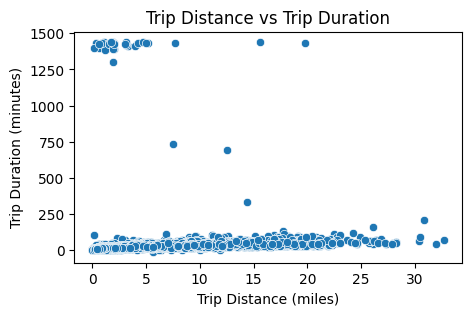

In [90]:
# 주행 시간 계산
data_cleaned['tpep_pickup_datetime'] = pd.to_datetime(data_cleaned['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
data_cleaned['tpep_dropoff_datetime'] = pd.to_datetime(data_cleaned['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')
data_cleaned['trip_duration'] = (data_cleaned['tpep_dropoff_datetime'] - data_cleaned['tpep_pickup_datetime']).dt.total_seconds() / 60

# 주행 시간과 주행 거리의 관계 시각화
plt.figure(figsize=(5, 3))
sns.scatterplot(x=data_cleaned['trip_distance'], y=data_cleaned['trip_duration'])
plt.title('Trip Distance vs Trip Duration')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Trip Duration (minutes)')
plt.show()


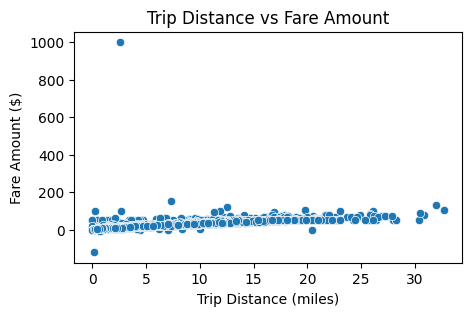

In [92]:
# 택시 주행거리와 요금의 관계
plt.figure(figsize=(5, 3))
sns.scatterplot(x=data_cleaned['trip_distance'], y=data_cleaned['fare_amount'])
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()

In [88]:
# Credit Card와 Debit Card를 구분없이 'Card'라는 이름으로 만들기
data_cleaned['payment_method'].replace({'Credit Card': 'Card', 'Debit Card': 'Card'}, inplace=True)
data_cleaned['payment_method'].value_counts()

payment_method
Card    10501
Cash    10217
Name: count, dtype: int64

In [44]:
# 픽업 및 드롭오프 시간에서 시간, 요일, 월 등을 추출
# 날짜 및 시간 데이터 변환
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

# 필요한 정보 추출
data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour
data['pickup_day_of_week'] = data['tpep_pickup_datetime'].dt.dayofweek
data['pickup_month'] = data['tpep_pickup_datetime'].dt.month

data['dropoff_hour'] = data['tpep_dropoff_datetime'].dt.hour
data['dropoff_day_of_week'] = data['tpep_dropoff_datetime'].dt.dayofweek
data['dropoff_month'] = data['tpep_dropoff_datetime'].dt.month

# 결과 확인
data[['tpep_pickup_datetime', 'pickup_hour', 'pickup_day_of_week', 'pickup_month', 'tpep_dropoff_datetime', 'dropoff_hour', 'dropoff_day_of_week', 'dropoff_month']].head()


<ipython-input-44-2ae75987ac76>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
<ipython-input-44-2ae75987ac76>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])


,tpep_pickup_datetime,pickup_hour,pickup_day_of_week,pickup_month,tpep_dropoff_datetime,dropoff_hour,dropoff_day_of_week,dropoff_month
0,2017-04-11 14:53:28,14,1,4,2017-04-11 15:19:58,15,1,4
1,2017-12-15 07:26:56,7,4,12,2017-12-15 07:34:08,7,4,12
2,2017-04-15 23:32:20,23,5,4,2017-04-15 23:49:03,23,5,4
3,2017-05-03 19:04:09,19,2,5,2017-05-03 20:03:47,20,2,5
4,2017-08-15 17:41:06,17,1,8,2017-08-15 18:03:05,18,1,8


In [46]:
# 주행시간 분석
# 픽업시간, 드롭오프 시간 차이 계산
data['trip_duration'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']
data['trip_duration_minutes'] = data['trip_duration'].dt.total_seconds() / 60

# 결과
data[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_duration', 'trip_duration_minutes']].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_duration,trip_duration_minutes
0,2017-04-11 14:53:28,2017-04-11 15:19:58,0 days 00:26:30,26.500000
1,2017-12-15 07:26:56,2017-12-15 07:34:08,0 days 00:07:12,7.200000
2,2017-04-15 23:32:20,2017-04-15 23:49:03,0 days 00:16:43,16.716667
3,2017-05-03 19:04:09,2017-05-03 20:03:47,0 days 00:59:38,59.633333
4,2017-08-15 17:41:06,2017-08-15 18:03:05,0 days 00:21:59,21.983333


In [47]:
# 픽업시간대별 분석
hourly_pickups = data['pickup_hour'].value_counts().sort_index()

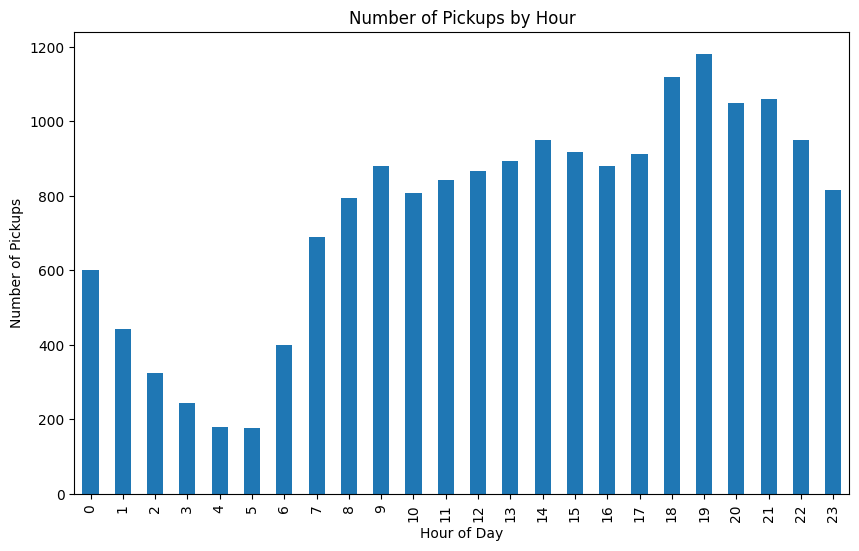

In [50]:
# 픽업 시간대별 분석 시각화
plt.figure(figsize=(10, 6))
hourly_pickups.plot(kind='bar')
plt.title('Number of Pickups by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.show()

In [51]:
# 결제 방법별 패턴
data['payment_method'] = data['payment_method'].replace({'Credit Card': 'Card', 'Debit Card': 'Card'})

# 결제 방법별 데이터 확인
payment_method_counts = data['payment_method'].value_counts()
print(payment_method_counts)

payment_method
Card    9153
Cash    8832
Name: count, dtype: int64
